This notebook reproduces 

> **Fig 2**: Pure Zeeman effect in the first excited states of positronium.

from the article

> #### Combined Zeeman and Motional Stark Effects in the First Excited State of Positroninm
>
> Stephen M. Curry
>
> *Phys. Rev. A*, **7** (2), 447 (1973) [DOI:10.1103/PhysRevA.7.447](https://doi.org/10.1103/PhysRevA.7.447)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyps import Basis, Hamiltonian
from pyps.constants import En_h, h
from smtools import sm_sort, lc_cmap

In [2]:
# construct matrix
H = Hamiltonian(Basis(n_values=[2]), sparse_format="array")
print(f"Number of basis states: {H.basis.num_states}")

Number of basis states: 16


In [3]:
# calculate Zeeman map
Bfield = np.linspace(0, 0.7, 1000)  # T
triplets = list(H.basis.argwhere(lambda x: x.S == 1))
zm, amp = H.zeeman_map(Bfield, elements=triplets, units="Hz", tqdm_kw={"disable": True})

# sort
zm, amp = sm_sort(zm, amp)

# ensure 0 < amp < 1
amp = np.clip(amp, 0, 1)

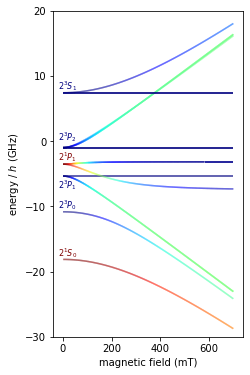

In [4]:
cmap = cm.jet_r

# plot Zeeman map
fig, ax = plt.subplots(figsize=(3.4, 6))

# data
y_offset = En_h / (16 * h)
for ix in H.basis.argwhere(lambda x: x.n == 2):
    cs = cmap(amp[:, ix], alpha=0.8)
    lc = lc_cmap(1e3 * Bfield, 1e-9 * (zm[:, ix] + y_offset), cs)
    lc.set_linewidth(1.5)
    ax.add_collection(lc)

# labels
m_zeros = H.basis.where(lambda x: x.n == 2 and x.MJ == 0)
y_adjust = [0.6, 0.6, -1.8, 0.6, 1.2, 0.6]
for state, adjust in zip(m_zeros, y_adjust):
    c = cmap(float(state.S))
    lbl = state.tex(show_MJ=False)
    en = 1e-9 * (state.energy(units="Hz") + y_offset)
    ax.annotate(lbl, [-20, en + adjust], size=8, color=c)

# format
ax.set_xlim(-40, np.max(Bfield) * 1e3 + 40)
ax.set_ylim(-30, 20)
ax.set_ylabel("energy / $h$ (GHz)")
ax.set_xlabel("magnetic field (mT)")

# output
fileout = os.path.join("../images/zeeman_n2.png")
plt.savefig(fileout, dpi=150, bbox_inches="tight")
plt.show()